In [1]:
# load libraries
import json
from collections import defaultdict

In [2]:
# we are going to calculate how the distribution of genders of the prize winners
# first, open the laureates json

# list of all the winners of the prize and their relevant details
d = json.loads(open('laureates.json').read())['laureates']

gender_count = defaultdict(int)

for i in range(0, len(d)):
    gender_count[d[i]['gender']] += 1
    
print(gender_count)

defaultdict(<class 'int'>, {'male': 839, 'female': 48, 'org': 23})


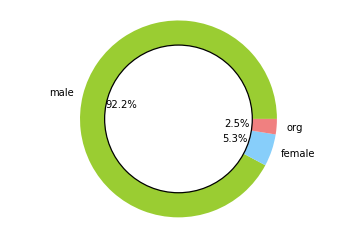

In [3]:
import matplotlib.pyplot as plt

labels = [k for k in gender_count.keys()]
sizes = [v for v in gender_count.values()]
colors= ['yellowgreen', 'lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

centre_circle = plt.Circle((0,0), 0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

In [4]:
dp = json.loads(open('prizes.json').read())['prizes']

physics = []
chemistry = []
economics = []
medicine= []
peace = []
literature = []

lookup = {'physics': physics, 'chemistry': chemistry, 'medicine': medicine,
         'literature': literature, 'peace': peace, 'economics': economics}

# 2 pass -> prizes [year, category, laureates [firstname, lastname, id]]-> laureates

# find year of birth

# {} newDataSet
#    [] physics
#       {} i
#        - 2016
#        [] laureates
#            - id
#            - firstname
#            - surname
#            - motivation
#            - age = 2017 - year of birth
#            - born country
#            - gender

# cycle through prizes
for i in range(0, len(dp)):
    current = {}
    
    current['year'] = dp[i]['year']
    current['laureates'] = []

    for j in range(0, len(dp[i]['laureates'])):
        c_lau = dp[i]['laureates'][j]
        lau = {}
        lau['id'] = c_lau['id']
        lau['firstname'] = c_lau['firstname']
        lau['surname'] = c_lau['surname']
        lau['motivation'] = c_lau.get('motivation', '')
        
        current['laureates'].append(lau)  
        
    lookup.get(dp[i]['category']).append(current)

        
print('physics: ' + str(len(physics)))
# print(physics)

print('\nchemistry: ' + str(len(chemistry)))
# print(chemistry)

print('\nmedicine: ' + str(len(medicine)))
# print(medicine)

print('\nliterature: ' + str(len(literature)))
# print(literature)

print('\npeace: ' + str(len(peace)))
# print(peace)

print('\neconomics: ' + str(len(economics)))
# print(economics)



physics: 110

chemistry: 108

medicine: 107

literature: 109

peace: 97

economics: 48


In [5]:
from itertools import chain

for i in chain(physics, chemistry, medicine, literature, peace, economics):
    for j in range(0, len(i['laureates'])):
        _currID = i['laureates'][j]['id']
    
        for k in d:
            if k['id'] == _currID:
                i['laureates'][j]['bornCountryCode'] = k.get('bornCountryCode', 'und')
                birth_year = int(k['born'][0:4])
                i['laureates'][j]['age'] = int(i['year']) - birth_year
                i['laureates'][j]['gender'] = k.get('gender')

print(physics)

[{'year': '2016', 'laureates': [{'id': '928', 'firstname': 'David J.', 'surname': 'Thouless', 'motivation': '"for theoretical discoveries of topological phase transitions and topological phases of matter"', 'bornCountryCode': 'GB', 'age': 82, 'gender': 'male'}, {'id': '929', 'firstname': 'F. Duncan M.', 'surname': 'Haldane', 'motivation': '"for theoretical discoveries of topological phase transitions and topological phases of matter"', 'bornCountryCode': 'GB', 'age': 65, 'gender': 'male'}, {'id': '930', 'firstname': 'J. Michael', 'surname': 'Kosterlitz', 'motivation': '"for theoretical discoveries of topological phase transitions and topological phases of matter"', 'bornCountryCode': 'GB', 'age': 73, 'gender': 'male'}]}, {'year': '2015', 'laureates': [{'id': '919', 'firstname': 'Takaaki', 'surname': 'Kajita', 'motivation': '"for the discovery of neutrino oscillations, which shows that neutrinos have mass"', 'bornCountryCode': 'JP', 'age': 56, 'gender': 'male'}, {'id': '920', 'firstname

In [6]:
# combine everything in to one
lookup = {'physics': physics, 'chemistry': chemistry, 'medicine': medicine,
         'literature': literature, 'peace': peace, 'economics': economics}

newData = {}
for k, v in lookup.items():
    newData[k] = v;

with open('newData.json', 'w') as f:
    json.dump(newData, f)
    
f.close()

In [7]:
newData

{'chemistry': [{'laureates': [{'age': 72,
     'bornCountryCode': 'FR',
     'firstname': 'Jean-Pierre',
     'gender': 'male',
     'id': '931',
     'motivation': '"for the design and synthesis of molecular machines"',
     'surname': 'Sauvage'},
    {'age': 74,
     'bornCountryCode': 'GB',
     'firstname': 'Sir J. Fraser',
     'gender': 'male',
     'id': '932',
     'motivation': '"for the design and synthesis of molecular machines"',
     'surname': 'Stoddart'},
    {'age': 65,
     'bornCountryCode': 'NL',
     'firstname': 'Bernard L.',
     'gender': 'male',
     'id': '933',
     'motivation': '"for the design and synthesis of molecular machines"',
     'surname': 'Feringa'}],
   'year': '2016'},
  {'laureates': [{'age': 77,
     'bornCountryCode': 'SE',
     'firstname': 'Tomas',
     'gender': 'male',
     'id': '921',
     'motivation': '"for mechanistic studies of DNA repair"',
     'surname': 'Lindahl'},
    {'age': 69,
     'bornCountryCode': 'US',
     'firstname': '